In [ ]:
#Login google drive masing-masing
#Lakukan mounting google drive untuk memberikan akses google colaboratory, izinkan akses

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Import Library

from IPython.display import display
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, SimpleRNN, LSTM, GRU

import pandas as pd
import numpy as np
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

import plotly
import plotly.graph_objects as go

from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

In [ ]:
#Buka file dataset csv

df = pd.read_csv('NOx_CombinedCycle_GT2_1.csv')
display(df)

,Unnamed: 0,Name,GT SPEED,FUEL GAS PILOT RATIO,FUEL GAS PRESS (FOR FLOW COMPENSATION),ACTLD,COMB SHELL PRESS,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,EXHAUST GAS DUCT PRESS,...,BAROMETRIC PRESS,INLET AIR FILTER DIFF PRESS,GT CLOSED COOLING WATER OUTLET TEMP,Status,OUTLET FLUE GAS CO,OUTLET FLUE GAS CO2,OUTLET FLUE GAS SO2,OUTLET FLUE GAS NOx,OUTLET FLUE GAS O2,OUTLET FLUE GAS PARTICLE
0,0,8/1/2022 0:00,2998.1,8.37,40.8,199.2,14.22,28.2,430.8,232.6,...,753.1,46.8,31.4,0,0.4,3.9,0.0,19.5,13.9,-0.4
1,1,8/1/2022 0:01,2997.4,8.42,40.8,199.0,14.22,28.2,430.8,233.5,...,753.1,46.6,31.5,0,0.4,3.9,0.0,19.5,13.9,-0.3
2,2,8/1/2022 0:02,2999.6,8.40,40.8,200.2,14.23,28.2,430.8,229.9,...,753.1,47.3,31.3,0,0.4,3.9,0.0,19.4,13.9,-0.4
3,3,8/1/2022 0:03,2997.4,8.36,40.8,200.8,14.24,28.2,430.8,233.5,...,753.0,47.2,31.4,0,0.4,3.9,0.0,19.6,13.9,-0.4
4,4,8/1/2022 0:04,2996.6,8.27,40.8,203.1,14.29,28.2,430.8,232.6,...,753.1,47.0,31.4,0,0.3,3.9,0.0,19.8,13.9,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,129595,2/21/2023 23:55,3000.0,10.10,41.3,180.5,13.51,28.0,419.7,231.8,...,752.7,24.3,29.8,1,1.9,3.7,0.0,27.2,14.4,21.6
129596,129596,2/21/2023 23:56,2998.5,10.12,41.3,180.5,13.50,28.1,419.9,231.9,...,752.7,24.2,29.8,1,2.1,3.7,0.1,27.3,14.5,22.3
129597,129597,2/21/2023 23:57,3001.5,10.19,41.3,180.3,13.51,28.1,420.0,235.2,...,752.7,24.2,29.9,1,2.0,3.7,0.0,27.3,14.4,22.1
129598,129598,2/21/2023 23:58,3001.1,10.19,41.3,180.3,13.50,28.1,420.0,232.0,...,752.7,24.4,29.9,1,1.9,3.7,0.0,27.6,14.4,23.1


In [ ]:
#Memastikan hanya operasi combined cycle saja, tidak menggunakan operasi simple cycle

df_clean =df[df['OUTLET FLUE GAS NOx '] !=0]
df_clean.reset_index(inplace=True, drop=True)
display(df_clean)

,Unnamed: 0,Name,GT SPEED,FUEL GAS PILOT RATIO,FUEL GAS PRESS (FOR FLOW COMPENSATION),ACTLD,COMB SHELL PRESS,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,EXHAUST GAS DUCT PRESS,...,BAROMETRIC PRESS,INLET AIR FILTER DIFF PRESS,GT CLOSED COOLING WATER OUTLET TEMP,Status,OUTLET FLUE GAS CO,OUTLET FLUE GAS CO2,OUTLET FLUE GAS SO2,OUTLET FLUE GAS NOx,OUTLET FLUE GAS O2,OUTLET FLUE GAS PARTICLE
0,0,8/1/2022 0:00,2998.1,8.37,40.8,199.2,14.22,28.2,430.8,232.6,...,753.1,46.8,31.4,0,0.4,3.9,0.0,19.5,13.9,-0.4
1,1,8/1/2022 0:01,2997.4,8.42,40.8,199.0,14.22,28.2,430.8,233.5,...,753.1,46.6,31.5,0,0.4,3.9,0.0,19.5,13.9,-0.3
2,2,8/1/2022 0:02,2999.6,8.40,40.8,200.2,14.23,28.2,430.8,229.9,...,753.1,47.3,31.3,0,0.4,3.9,0.0,19.4,13.9,-0.4
3,3,8/1/2022 0:03,2997.4,8.36,40.8,200.8,14.24,28.2,430.8,233.5,...,753.0,47.2,31.4,0,0.4,3.9,0.0,19.6,13.9,-0.4
4,4,8/1/2022 0:04,2996.6,8.27,40.8,203.1,14.29,28.2,430.8,232.6,...,753.1,47.0,31.4,0,0.3,3.9,0.0,19.8,13.9,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,129595,2/21/2023 23:55,3000.0,10.10,41.3,180.5,13.51,28.0,419.7,231.8,...,752.7,24.3,29.8,1,1.9,3.7,0.0,27.2,14.4,21.6
129596,129596,2/21/2023 23:56,2998.5,10.12,41.3,180.5,13.50,28.1,419.9,231.9,...,752.7,24.2,29.8,1,2.1,3.7,0.1,27.3,14.5,22.3
129597,129597,2/21/2023 23:57,3001.5,10.19,41.3,180.3,13.51,28.1,420.0,235.2,...,752.7,24.2,29.9,1,2.0,3.7,0.0,27.3,14.4,22.1
129598,129598,2/21/2023 23:58,3001.1,10.19,41.3,180.3,13.50,28.1,420.0,232.0,...,752.7,24.4,29.9,1,1.9,3.7,0.0,27.6,14.4,23.1


In [ ]:
#Deskripsi data

df_clean.describe()

,Unnamed: 0,GT SPEED,FUEL GAS PILOT RATIO,FUEL GAS PRESS (FOR FLOW COMPENSATION),ACTLD,COMB SHELL PRESS,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,EXHAUST GAS DUCT PRESS,IGV POSITION (ANGLE),...,BAROMETRIC PRESS,INLET AIR FILTER DIFF PRESS,GT CLOSED COOLING WATER OUTLET TEMP,Status,OUTLET FLUE GAS CO,OUTLET FLUE GAS CO2,OUTLET FLUE GAS SO2,OUTLET FLUE GAS NOx,OUTLET FLUE GAS O2,OUTLET FLUE GAS PARTICLE
count,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,...,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000
mean,64799.500000,2999.745362,10.101630,40.943261,180.320315,13.394275,27.937318,420.122177,226.007092,16.564813,...,753.149556,35.907898,30.433665,0.500000,1.984406,3.748237,0.007797,29.734597,14.188073,10.688800
std,37412.441781,5.583061,2.474593,0.224733,45.602888,2.153924,1.667162,26.694720,51.449563,14.816665,...,1.199743,15.275066,2.108357,0.500002,5.720202,0.332468,0.084865,4.872998,0.584834,11.245415
min,0.000000,2941.900000,7.170000,29.000000,70.300000,9.640000,23.500000,377.900000,161.100000,-4.000000,...,749.400000,14.800000,24.200000,0.000000,0.000000,0.000000,0.000000,0.300000,5.700000,-2.300000
25%,32399.750000,2996.300000,7.690000,40.700000,130.400000,11.060000,26.800000,392.800000,174.200000,1.700000,...,752.300000,19.400000,29.000000,0.000000,0.000000,3.400000,0.000000,26.400000,13.600000,-0.400000
50%,64799.500000,2999.600000,9.530000,41.000000,180.500000,13.340000,28.000000,418.100000,224.100000,20.000000,...,753.200000,35.900000,30.500000,0.500000,1.200000,3.700000,0.000000,30.000000,14.300000,-0.300000
75%,97199.250000,3002.600000,13.190000,41.100000,226.700000,15.500000,29.200000,449.400000,269.800000,32.200000,...,754.000000,51.200000,31.900000,1.000000,2.800000,4.100000,0.000000,32.400000,14.800000,21.600000
max,129599.000000,3028.100000,21.480000,41.500000,248.800000,16.730000,34.000000,457.300000,323.900000,34.000000,...,756.800000,100.700000,36.900000,1.000000,243.800000,4.200000,21.600000,42.100000,20.800000,88.600000


In [ ]:
#Informasi mengenai parameter yang dipakai

df_temp = df[['Name','OUTLET FLUE GAS NOx ', 'ACTLD', 'COMB SHELL PRESS', 'COMP INLET AIR TEMP', 'COMP OUTLET AIR TEMP',
               'EXHAUST GAS DUCT PRESS', 'FUEL GAS PILOT RATIO', 'FUEL GAS HEATER OUTLET TEMP', 'GT FUEL GAS FLOW (AFTER CORRECT)',
               'FUEL GAS PRESS (FOR FLOW COMPENSATION)', 'FG PILOT MANIFOLD PRESS', 'FG MAIN MANIFOLD PRESS', 'BLADE PATH AVG TEMP(BPT)',
               'EXHAUST GAS AVG TEMP(EXT)', 'ROTOR COOLING AIR TEMP AVE.']]

df_temp.info()

,Name,OUTLET FLUE GAS NOx,ACTLD,COMB SHELL PRESS,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,EXHAUST GAS DUCT PRESS,FUEL GAS PILOT RATIO,FUEL GAS HEATER OUTLET TEMP,GT FUEL GAS FLOW (AFTER CORRECT),FUEL GAS PRESS (FOR FLOW COMPENSATION),FG PILOT MANIFOLD PRESS,FG MAIN MANIFOLD PRESS,BLADE PATH AVG TEMP(BPT),EXHAUST GAS AVG TEMP(EXT),ROTOR COOLING AIR TEMP AVE.
0,8/1/2022 0:00,19.5,199.2,14.22,28.2,430.8,232.6,8.37,200.5,55207.0,40.8,17.0,16.1,590.3,583.2,251.8
1,8/1/2022 0:01,19.5,199.0,14.22,28.2,430.8,233.5,8.42,199.4,55266.3,40.8,17.0,16.1,590.2,583.1,251.6
2,8/1/2022 0:02,19.4,200.2,14.23,28.2,430.8,229.9,8.40,197.9,55448.3,40.8,17.1,16.1,590.3,583.1,251.6
3,8/1/2022 0:03,19.6,200.8,14.24,28.2,430.8,233.5,8.36,198.0,55535.7,40.8,17.0,16.1,590.7,583.2,251.4
4,8/1/2022 0:04,19.8,203.1,14.29,28.2,430.8,232.6,8.27,200.5,56230.8,40.8,17.1,16.3,590.7,583.4,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,2/21/2023 23:55,27.2,180.5,13.51,28.0,419.7,231.8,10.10,200.3,49512.5,41.3,17.9,15.1,555.5,555.1,237.6
129596,2/21/2023 23:56,27.3,180.5,13.50,28.1,419.9,231.9,10.12,200.3,49591.3,41.3,17.9,15.0,555.5,555.3,237.5
129597,2/21/2023 23:57,27.3,180.3,13.51,28.1,420.0,235.2,10.19,199.0,49371.0,41.3,17.9,15.1,554.5,555.1,237.5
129598,2/21/2023 23:58,27.6,180.3,13.50,28.1,420.0,232.0,10.19,200.5,49467.3,41.3,17.9,15.1,554.6,555.1,237.5


--------Melakukan Scaling Data---------

In [ ]:
#Scaling Data, dapat mencoba StandardScaler ataupun MinMaxScaler dan bandingkan hasilnya

TargetVariable=['OUTLET FLUE GAS NOx ']


Predictors=['ACTLD', 'COMB SHELL PRESS', 'COMP INLET AIR TEMP', 'COMP OUTLET AIR TEMP',
               'EXHAUST GAS DUCT PRESS', 'FUEL GAS PILOT RATIO', 'FUEL GAS HEATER OUTLET TEMP', 'GT FUEL GAS FLOW (AFTER CORRECT)',
               'FUEL GAS PRESS (FOR FLOW COMPENSATION)', 'FG PILOT MANIFOLD PRESS', 'FG MAIN MANIFOLD PRESS', 'BLADE PATH AVG TEMP(BPT)',
               'EXHAUST GAS AVG TEMP(EXT)', 'ROTOR COOLING AIR TEMP AVE.']

X=df[Predictors].values
y=df[TargetVariable].values

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

scaler = RobustScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

------Pembuatan Model Machine Learning----------

In [ ]:
#Buat Model XGBR, RFR, Lasso, dan ANN
#Dapat lakukan tuning parameter dan bandingkan hasilnya

Model_XGBR = XGBRegressor(n_estimators=100, max_depth=7)
Model_RFR = RandomForestRegressor(n_estimators=100, max_depth = 7, random_state=0, oob_score=True)
Model_Lasso = linear_model.Lasso(alpha=0.0001)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Model_ANN = Sequential()

Model_ANN.add(Dense(units = 10, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

Model_ANN.add(Dense(units = 10, kernel_initializer='normal', activation='relu'))

Model_ANN.add(Dense(1, kernel_initializer='normal'))

Model_ANN.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])



-------Kalkulasi Model XGBR---------

In [ ]:
Model_XGBR.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

--------Kalkulasi Model Lasso---------

In [ ]:
Model_Lasso.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.033e+03, tolerance: 7.697e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0001)

-------Kalkulasi Model Random Forest Regressor--------

In [ ]:
Model_RFR.fit(X_train, y_train.ravel())


RandomForestRegressor(max_depth=7, oob_score=True, random_state=0)

In [ ]:
------Kalkulasi Model Artificial Neural Network---------

In [ ]:
history_ANN = Model_ANN.fit(X_train, y_train ,batch_size = 128, epochs = 50, verbose=1)

Epoch 1/50
912/912 [==============================] - 4s 3ms/step - loss: 0.1535 - accuracy: 0.0112
Epoch 2/50
912/912 [==============================] - 2s 3ms/step - loss: 0.0668 - accuracy: 0.0115
Epoch 3/50
912/912 [==============================] - 2s 2ms/step - loss: 0.0570 - accuracy: 0.0116
Epoch 4/50
912/912 [==============================] - 2s 2ms/step - loss: 0.0502 - accuracy: 0.0116
Epoch 5/50
912/912 [==============================] - 2s 2ms/step - loss: 0.0465 - accuracy: 0.0116
Epoch 6/50
912/912 [==============================] - 2s 2ms/step - loss: 0.0436 - accuracy: 0.0116
Epoch 7/50
912/912 [==============================] - 2s 2ms/step - loss: 0.0414 - accuracy: 0.0116
Epoch 8/50
912/912 [==============================] - 2s 2ms/step - loss: 0.0394 - accuracy: 0.0116
Epoch 9/50
912/912 [==============================] - 2s 3ms/step - loss: 0.0377 - accuracy: 0.0116
Epoch 10/50
912/912 [==============================] - 2s 3ms/step - loss: 0.0362 - accuracy: 0.0116

--------Prediksi Nilai NOx dari Berbagai Model-----------

In [ ]:
y_pred_XGBR = Model_XGBR.predict(X_test)

#y_pred_SVR = Model_SVR.predict(X_test)

y_pred_RFR = Model_RFR.predict(X_test)

y_pred_Lasso = Model_Lasso.predict(X_test)

y_pred_ANN = Model_ANN.predict(X_test)


405/405 [==============================] - 1s 1ms/step


----------Perhitungan Nilai R2, MAE, dan MSE-----------------

---


In [ ]:
R2_XGBR = r2_score(y_test, y_pred_XGBR)
#R2_SVR = r2_score(y_test, y_pred_SVR)
R2_RFR = r2_score(y_test, y_pred_RFR)
R2_Lasso = r2_score(y_test, y_pred_Lasso)
R2_ANN = r2_score(y_test, y_pred_ANN)

print("R2 XGBR : ", round(R2_XGBR,2)*100, " %\n")
#print("R2 SVR : ", round(R2_SVR,2)*100, " %\n")
print("R2 RFR : ", round(R2_RFR,2)*100, " %\n")
print("R2 Lasso : ", round(R2_Lasso,2)*100, " %\n")
print("R2 ANN : ", round(R2_ANN,2)*100, " %\n")

R2 XGBR :  98.0  %

R2 RFR :  95.0  %

R2 Lasso :  89.0  %

R2 ANN :  97.0  %



In [ ]:
MSE_XGBR = mean_squared_error(y_test, y_pred_XGBR)
#MSE_SVR = mean_squared_error(y_test, y_pred_SVR)
MSE_RFR = mean_squared_error(y_test, y_pred_RFR)
MSE_Lasso = mean_squared_error(y_test, y_pred_Lasso)
MSE_ANN = mean_squared_error(y_test, y_pred_ANN)

print("MSE XGBR : ", MSE_XGBR, "\n")
#print("MSE SVR : ", MSE_SVR, "\n")
print("MSE RFR : ", MSE_RFR, "\n")
print("MSE Lasso : ", MSE_Lasso, "\n")
print("MSE ANN : ", MSE_ANN, "\n")

MSE XGBR :  0.012037490760580357 

MSE RFR :  0.03531858966248099 

MSE Lasso :  0.07437017129601282 

MSE Lasso :  0.021929728214345384 



In [ ]:
MAE_XGBR = mean_absolute_error(y_test, y_pred_XGBR)
#MAE_SVR = mean_absolute_error(y_test, y_pred_SVR)
MAE_RFR = mean_absolute_error(y_test, y_pred_RFR)
MAE_Lasso = mean_absolute_error(y_test, y_pred_Lasso)
MAE_ANN = mean_absolute_error(y_test, y_pred_ANN)

print("MAE XGBR : ", MAE_XGBR, "\n")
#print("MAE SVR : ", MAE_SVR, "\n")
print("MAE RFR : ", MAE_RFR, "\n")
print("MAE Lasso : ", MAE_Lasso, "\n")
print("MAE ANN : ", MAE_ANN, "\n")

MAE XGBR :  0.0781060674037698 

MAE RFR :  0.14094502961016936 

MAE Lasso :  0.21320707766753194 

MAE Lasso :  0.11429048828033292 



------------Create Dataset dari hasil prediksi--------------

In [ ]:
y_test = scaler.inverse_transform(y_test)
y_pred_XGBR = scaler.inverse_transform(y_pred_XGBR.reshape(-1,1))
#y_pred_SVR = scaler.inverse_transform(y_pred_SVR.reshape(-1,1))
y_pred_RFR = scaler.inverse_transform(y_pred_RFR.reshape(-1,1))
y_pred_Lasso = scaler.inverse_transform(y_pred_Lasso.reshape(-1,1))
y_pred_ANN = scaler.inverse_transform(y_pred_ANN.reshape(-1,1))

y_test = pd.DataFrame(y_test)
y_pred_XGBR = pd.DataFrame(y_pred_XGBR)
y_pred_RFR = pd.DataFrame(y_pred_RFR)
#y_pred_SVR = pd.DataFrame(y_pred_SVR)
y_pred_Lasso = pd.DataFrame(y_pred_Lasso)
y_pred_ANN = pd.DataFrame(y_pred_ANN)

In [ ]:
X_test = scaler.inverse_transform(X_test)
X_test = pd.DataFrame(X_test, columns=Predictors)
display(X_test)

,ACTLD,COMB SHELL PRESS,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,EXHAUST GAS DUCT PRESS,FUEL GAS PILOT RATIO,FUEL GAS HEATER OUTLET TEMP,GT FUEL GAS FLOW (AFTER CORRECT),FUEL GAS PRESS (FOR FLOW COMPENSATION),FG PILOT MANIFOLD PRESS,FG MAIN MANIFOLD PRESS,BLADE PATH AVG TEMP(BPT),EXHAUST GAS AVG TEMP(EXT),ROTOR COOLING AIR TEMP AVE.
0,33.638629,33.986486,28.50,33.561837,35.177824,27.709091,25.913514,33.962204,31.5,37.263158,33.927273,33.408492,33.238938,29.967391
1,32.778816,32.770270,33.75,33.159011,32.497908,28.080000,31.881081,33.136948,25.5,33.473684,32.836364,34.348463,34.258407,30.097826
2,33.638629,34.000000,32.00,33.678445,35.284519,27.687273,26.140541,33.791982,25.5,37.263158,33.818182,33.540264,33.408850,30.945652
3,28.112150,27.959459,30.75,28.197880,27.025105,31.352727,32.335135,28.502692,34.5,28.105263,28.036364,29.095168,29.118584,27.000000
4,30.000000,30.040541,22.00,29.067138,30.050209,30.818182,31.945946,29.873894,30.0,32.526316,29.890909,29.183016,28.385841,31.108696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,33.476636,33.770270,32.50,33.657244,34.788703,27.709091,25.621622,33.660010,25.5,36.315789,33.600000,33.601757,33.557522,30.750000
12956,28.274143,28.054054,26.25,28.420495,27.025105,31.069091,25.491892,28.793431,30.0,26.210526,28.145455,29.754026,29.734513,28.173913
12957,31.271028,32.094595,33.25,31.992933,32.523013,29.792727,31.102703,31.112153,25.5,36.000000,31.854545,29.130307,27.791150,40.369565
12958,28.143302,27.986486,29.00,28.049470,27.269874,31.276364,31.881081,28.326396,34.5,28.105263,28.145455,28.937042,28.916814,27.000000


------------Simpan Hasil Model dengan Joblib------------

---



In [ ]:
import joblib

joblib.dump(Model_XGBR, 'Model_XGBR.joblib')
joblib.dump(Model_RFR, 'Model_RFR.joblib')
joblib.dump(Model_Lasso, 'Model_Lasso.joblib')
joblib.dump(Model_ANN, 'Model_ANN.joblib')



['/content/gdrive/MyDrive/00_Ferdi_ALL/00_PLN/09_Work/55_IndustrialConf_IT_PLN/colab/Model_Save_New/Model_ANN.joblib']

-----------PLotting Figure masing-masing Model============

Text(0, 0.5, 'Emission NOx')

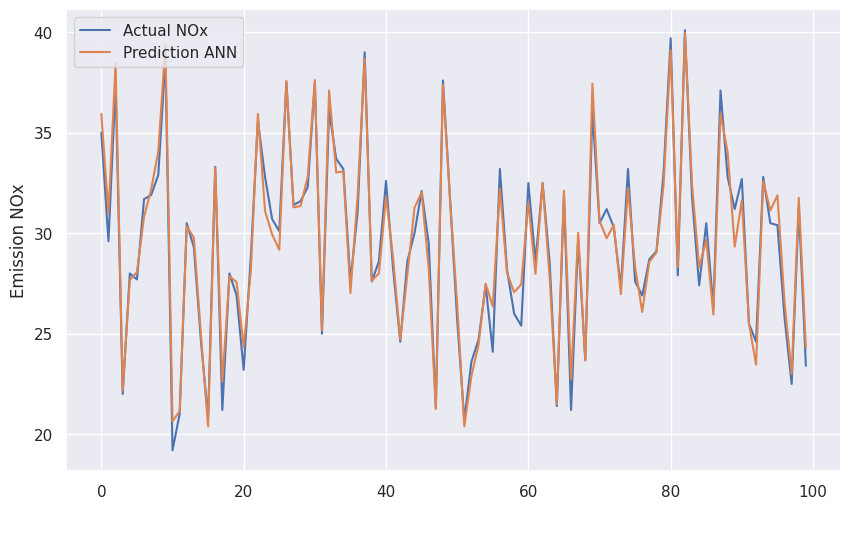

In [ ]:
plt.figure(figsize=(10, 6))
range_future = len(y_pred_XGBR)
nn = 100
plt.plot(y_test.index[:nn], np.array(y_test[:nn]),
             label='Actual NOx')

#MODEL XGBR
#plt.plot(y_test.index[:nn],np.array(y_pred_XGBR[:nn]),label='Prediction XGBR')

#MODEL RFR
#plt.plot(y_test.index[:nn],np.array(y_pred_RFR[:nn]),label='Prediction RFR')

#MODEL LASSO
#plt.plot(y_test.index[:nn],np.array(y_pred_Lasso[:nn]),label='Prediction Lasso')

#MODEL ANN
plt.plot(y_test.index[:nn],np.array(y_pred_ANN[:nn]),label='Prediction ANN')

plt.legend(loc='upper left')
plt.xlabel(' ')
plt.ylabel('Emission NOx')



---


------------Gambar Neural Network Architecture-------------

---



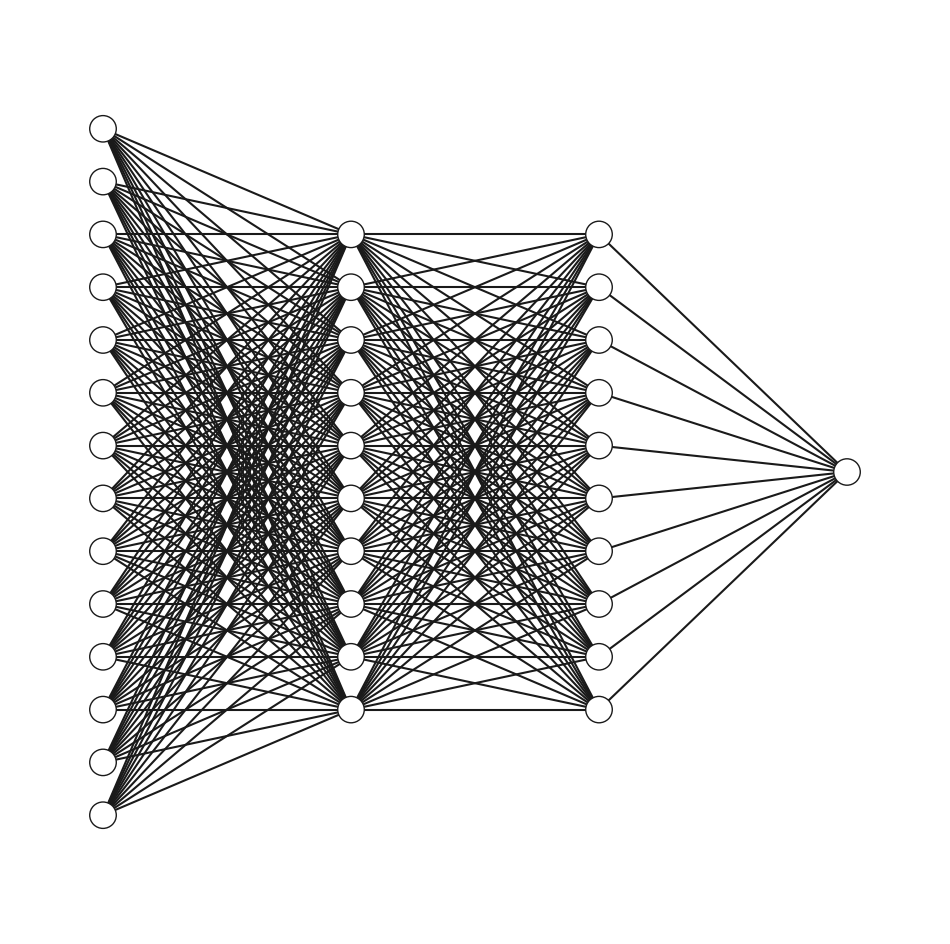

In [ ]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.

    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])

    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)


fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [14, 10, 10, 1])



---
LOAD MODEL


---





In [ ]:
Model_XGBR = joblib.load('/content/gdrive/MyDrive/00_Ferdi_ALL/00_PLN/09_Work/55_IndustrialConf_IT_PLN/colab/Model_Save_New/Model_XGBR.joblib')
Model_RFR = joblib.load('/content/gdrive/MyDrive/00_Ferdi_ALL/00_PLN/09_Work/55_IndustrialConf_IT_PLN/colab/Model_Save_New/Model_RFR.joblib')
Model_Lasso = joblib.load('/content/gdrive/MyDrive/00_Ferdi_ALL/00_PLN/09_Work/55_IndustrialConf_IT_PLN/colab/Model_Save_New/Model_Lasso.joblib')
Model_ANN = joblib.load('/content/gdrive/MyDrive/00_Ferdi_ALL/00_PLN/09_Work/55_IndustrialConf_IT_PLN/colab/Model_Save_New/Model_ANN.joblib')